# How to do Classification and Regression with Pyspark

- **Supported by TingLin**

- **Kansas State University**

# **Table of Contents**

- **Classification**

  - [Logistic regression](#Logistic regression )
    
    - [Binomial logistic regression](#Binomial logistic regression )
    
    - [Multinomial logistic regression](#Multinomial logistic regression)
    
  - [Decision tree classifier](#Decision tree classifier)
    
  - [Random forest classifier](#Random forest classifier)
    
  - [Gradient-boosted tree classifier](#Gradient-boosted tree classifier)
    
  - [Multilayer perceptron classifier](#Multilayer perceptron classifier)
    
  - [Linear Support Vector Machine](#Linear Support Vector Machine)
    
  - [One-vs-Rest classifier (a.k.a. One-vs-All)](#One-vs-Rest classifier)
    
  - [Naive Bayes](#Naive Bayes)
    
- ** Regression**

  - [Linear regression](#Linear regression)
    
  - [Generalized linear regression](#Generalized linear regression)
    
  - [Available families](#Available families)
    
  - [Decision tree regression](#Decision tree regression)
    
  - [Random forest regression](#Random forest regression)
    
  - [Gradient-boosted tree regression](#Gradient-boosted tree regression)
    
  - [Survival regression](#Survival regression)
    
  - [Isotonic regression](#Isotonic regression)
      
- **How to do classification and build regression model for csv file**
  - [Binary Classification](#Binary Classification)
  - [Regression](#Regression)


# 1. What am I going to learn from this Pyspark Tutorial

- Apache Spark :
    -is a must for Big data’s lovers. In a few words, Spark is a fast and powerful framework that provides an API to perform massive distributed processing over resilient sets of data.
    - Apache Spark supports three most powerful programming languages:
        - 1. Scala
        - 2. Java
        - 3. Python
- Apache Spark is written in Scala programming language that compiles the program code into byte code for the JVM for spark big data processing. The open source community has developed a wonderful utility for spark python big data processing known as PySpark. PySpark helps data scientists interface with Resilient Distributed Datasets in apache spark and python.Py4J is a popularly library integrated within PySpark that lets python interface dynamically with JVM objects (RDD’s).
- Apache Spark comes with an interactive shell for python as it does for Scala. The shell for python is known as “PySpark”. To use PySpark you will have to have python installed on your machine. As we know that each Linux machine comes preinstalled with python so you need not worry about python installation. To get started in a standalone mode you can download the pre-built version of spark from its official home page listed in the pre-requisites section of the PySpark tutorial. 
- Decompress the downloaded file. On decompressing the spark downloadable, you will see the following structure:
    - bin: Holds all the binaries
    - conf: Holds all the necessary configuration files to run any spark application
    - ec2: Holds the scripts to launch a cluster on amazon cloud space with multiple ec2 instances
    - lib: Holds the prebuilt libraries which make up the spark APIS.
    - Licenses:
        - python
        - python API
        - README.md:
            - Holds important instructions to get started with spark
            - Holds important startup scripts that are required to setup distributed clustter
        - CHANGES.txt:
            - Holds all the changes information for each version of apache spark
        - data:
            - Holds data that is used in the examples
        - examples:
            - Has examples which are a good place to learn the usage of spark functions
        - LICENSE NOTICE:
            - Important information
        - R:
            - Holds API of R language
        - RELEASE:
            - Holds make info of the downloaded version        
- Jupyter notebook:
    -is a popular application that enables you to edit, run and share Python code into a web view. It allows you to modify and re-execute parts of your code in a very flexible way. 
    -That’s why Jupyter is a great tool to test and prototype programs.
- Python:
    - is a powerful programming language for handling complex data analysis and data munging tasks. It has several in-built libraries and frameworks to do data mining tasks efficiently. However, no programming language alone can handle big data processing efficiently. There is always need for a distributed computing framework like Hadoop or Spark.
    

# Classification and regression


In [2]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
import pyspark.sql 
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql import SQLContext

from pyspark import SparkContext, SparkConf
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest
import numpy as np
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.linalg import SparseVector, DenseVector

In [3]:
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

- In Pysaprk, sqlContext is used as spark, it can read files

# 2. Classification
<a id = 'Logistic regression'></a>
- ** 2.1 Logistic regression**
<a id = 'Binomial logistic regression'></a>
    - 2.1.1 Binomial logistic regression

In [33]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(training)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Coefficients: (692,[244,263,272,300,301,328,350,351,378,379,405,406,407,428,433,434,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.35398352419e-05,-9.10273850559e-05,-0.000194674305469,-0.000203006424735,-3.14761833149e-05,-6.84297760266e-05,1.58836268982e-05,1.40234970914e-05,0.00035432047525,0.000114432728982,0.000100167123837,0.00060141093038,0.000284024817912,-0.000115410847365,0.000385996886313,0.000635019557424,-0.000115064123846,-0.00015271865865,0.000280493380899,0.000607011747119,-0.000200845966325,-0.000142107557929,0.000273901034116,0.00027730456245,-9.83802702727e-05,-0.000380852244352,-0.000253151980086,0.000277477147708,-0.000244361976392,-0.00153947446876,-0.000230733284113])
Intercept: 0.224563159613
Multinomial coefficients: 2 X 692 CSRMatrix
(0,244) 0.0
(0,263) 0.0001
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0
(0,351) -0.0
(0,378) -0.0
(0,379) -0.0
(0,405) -0.0
(0,406) -0.0006
(0,407) -0.0001
(0,428) 0.0001
(0,433) -0.0
(0,434) -0.0007
(0,455) 0.0001

- Logistic regression is a popular method to predict a categorical response. It is a special case of Generalized Linear models that predicts the probability of the outcomes. 
- elasticNetParam corresponds to α and regParam corresponds to λ.
- Multinomial logistic regression can be used for binary classification by setting the family param to “multinomial”. It will produce two sets of coefficients and two intercepts.
- When fitting LogisticRegressionModel without intercept on dataset with constant nonzero column, Spark MLlib outputs zero coefficients for constant nonzero columns. 
- In spark.ml, we also include Pipelines API for Elastic net, a hybrid of L1L1 and L2L2 regularization proposed in Zou et al, Regularization and variable selection via the elastic net. Mathematically, it is defined as a convex combination of the L1L1 and the L2L2 regularization terms:
    - α(λ‖w‖1)+(1−α)(λ2‖w‖22),α∈[0,1],λ≥0
    - α(λ‖w‖1)+(1−α)(λ2‖w‖22),α∈[0,1],λ≥0
- By setting αα properly, elastic net contains both L1L1 and L2L2 regularization as special cases. For example, if a linear regression model is trained with the elastic net parameter αα set to 11, it is equivalent to a Lasso model. On the other hand, if αα is set to 00, the trained model reduces to a ridge regression model. We implement Pipelines API for both linear regression and logistic regression with elastic net regularization.

In [34]:
from pyspark.ml.classification import LogisticRegression

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.683314913574
0.666287575147
0.621706854603
0.612726524589
0.60603479868
0.603175068757
0.596962153484
0.594074303198
0.590608924334
0.589472457649
0.588218777573
+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0


LogisticRegression_48ed8801c442a3d26e2e

- LogisticRegressionTrainingSummary provides a summary for a LogisticRegressionModel.

<a id = 'Multinomial logistic regression'></a>
- 2.1.2 Multinomial logistic regression

In [35]:

from pyspark.ml.classification import LogisticRegression

# Load training data
training = sqlContext \
    .read \
    .format("libsvm") \
    .load("data/mllib/sample_multiclass_classification_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

Coefficients: 
3 X 4 CSRMatrix
(0,3) 0.3176
(1,2) -0.7804
(1,3) -0.377
Intercept: [0.0516523165983,-0.123912249909,0.0722599333102]


- Multinomial logistic regression
- Multiclass classification is supported via multinomial logistic (softmax) regression. In multinomial logistic regression, the algorithm produces K sets of coefficients, or a matrix of dimension K×J where K is the number of outcome classes and J is the number of features. If the algorithm is fit with an intercept term then a length K vector of intercepts is available.

- Multinomial coefficients are available as coefficientMatrix and intercepts are available as interceptVector.
- coefficients and intercept methods on a logistic regression model trained with multinomial family are not supported. Use coefficientMatrix and interceptVector instead.
- The conditional probabilities of the outcome classes k∈1,2,…,Kk∈1,2,…,K are modeled using the softmax function.

    - P(Y=k|X,βk,β0k)=eβk⋅X+β0k∑K−1k′=0eβk′⋅X+β0k′
    - P(Y=k|X,βk,β0k)=eβk⋅X+β0k∑k′=0K−1eβk′⋅X+β0k′

- We minimize the weighted negative log-likelihood, using a multinomial response model, with elastic-net penalty to control for overfitting.

     -  minβ,β0−[∑i=1Lwi⋅logP(Y=yi|xi)]+λ[12(1−α)||β||22+α||β||1]

<a id = 'Decision tree classifier'></a>
- **2.2 Decision tree classifier**

In [36]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[95,96,97,12...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4eb184f930841a71fb90) of depth 2 with 5 nodes


- Decision trees and their ensembles are popular methods for the machine learning tasks of classification and regression. Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions. Tree ensemble algorithms such as random forests and boosting are among the top performers for classification and regression tasks.

- The spark.ml implementation supports decision trees for binary and multiclass classification and for regression, using both continuous and categorical features. The implementation partitions data by rows, allowing distributed training with millions or even billions of instances.

- Test error is 0.

<a id = 'Random forest classifier'></a>
- ** 2.3 Random forest classifier**

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+-----+--------------------+
|predictedLabel|label|            features|
+--------------+-----+--------------------+
|           0.0|  0.0|(692,[122,123,124...|
|           0.0|  0.0|(692,[123,124,125...|
|           0.0|  0.0|(692,[124,125,126...|
|           0.0|  0.0|(692,[124,125,126...|
|           0.0|  0.0|(692,[126,127,128...|
+--------------+-----+--------------------+
only showing top 5 rows

Test Error = 0
RandomForestClassificationModel (uid=RandomForestClassifier_47caa25b78b06d7f6ecc) with 10 trees


- Random forests are ensembles of decision trees. Random forests combine many decision trees in order to reduce the risk of overfitting. 

<a id = 'Gradient-boosted tree classifier'></a>
- ** 2.4 Gradient-boosted tree classifier** 

In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a GBT model.
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

# Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

gbtModel = model.stages[2]
print(gbtModel)  # summary only

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[121,122,123...|
|       1.0|         1.0|(692,[122,123,148...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.030303
GBTClassificationModel (uid=GBTClassifier_4fe7a651de3bd359cfdc) with 10 trees


- Gradient-Boosted Trees (GBTs) are ensembles of decision trees. GBTs iteratively train decision trees in order to minimize a loss function. 

<a id = 'Linear Support Vector Machine'></a>
- ** 2.5  Linear Support Vector Machine**

In [39]:
from pyspark.ml.classification import LinearSVC

# Load training data
training = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(training)

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000517063031747,-0.000117228865497,-8.88275483692e-05,8.52236071019e-05,0.0,0.0,-1.34363612633e-05,0.000372956980134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000888894955263,0.000298640597618,0.000379337881619,-0.000176232889825,0.0,1.50284892697e-06,1.80560411449e-06,1.80287632604e-06,-3.38437135065e-06,-4.04158018481e-06,2.0965017727e-06,8.53611164299e-05,0.000220641774296,0.000216775999406,-0.000547240139656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000921415502407,0.000313510668869,0.000248198431841,0.0,-4.14773819764e-05,-3.68321503845e-05,0.0,-3.96523661846

- A support vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. LinearSVC in Spark ML supports binary classification with linear SVM. Internally, it optimizes the Hinge Loss using OWLQN optimizer.

<a id = 'One-vs-Rest classifier'></a>
- **2.6 One-vs-Rest classifier (a.k.a. One-vs-All)**

In [41]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# load data file.
inputData = sqlContext.read.format("libsvm") \
    .load("data/mllib/sample_multiclass_classification_data.txt")

# generate the train/test split.
(train, test) = inputData.randomSplit([0.8, 0.2])

# instantiate the base classifier.
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# train the multiclass model.
ovrModel = ovr.fit(train)

# score the model on test data.
predictions = ovrModel.transform(test)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
gbtModel = model.stages[2]
print(gbtModel)  # summary only

Test Error = 0.0909091
GBTClassificationModel (uid=GBTClassifier_4fe7a651de3bd359cfdc) with 10 trees


- The one-vs.-rest[2]:182, 338 (or one-vs.-all, OvA or OvR, one-against-all, OAA) strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.[2]:182[note 1]

- In pseudocode, the training algorithm for an OvA learner constructed from a binary classification learner L is as follows:

- Inputs:
    - L, a learner (training algorithm for binary classifiers)
    - samples X
    - labels y where yi ∈ {1, … K} is the label for the sample Xi
- Output:
    - a list of classifiers fk for k ∈ {1, …, K}
- Procedure:
    - For each k in {1, …, K}
    - Construct a new label vector z where zi = 1 if yi = k and zi = 0 otherwise
    - Apply L to X, z to obtain fk
- Making decisions means applying all classifiers to an unseen sample x and predicting the label k for which the corresponding classifier reports the highest confidence score:
    - https://wikimedia.org/api/rest_v1/media/math/render/svg/8c0fb3a3d9afaaa9baa4a0701f49ff52e3121037

<a id = 'Naive Bayes'></a>
- ** 2.7 Naive Bayes**

In [42]:

from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = sqlContext.read.format("libsvm") \
    .load("data/mllib/sample_libsvm_data.txt")

# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|(692,[95,96,97,12...|[-174115.98587057...|  [1.0,0.0]|       0.0|
|  0.0|(692,[98,99,100,1...|[-178402.52307196...|  [1.0,0.0]|       0.0|
|  0.0|(692,[100,101,102...|[-100905.88974016...|  [1.0,0.0]|       0.0|
|  0.0|(692,[123,124,125...|[-244784.29791241...|  [1.0,0.0]|       0.0|
|  0.0|(692,[123,124,125...|[-196900.88506109...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-238164.45338794...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-184206.87833381...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-214174.52863813...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-182844.62193963...|  [1.0,0.0]|       0.0|
|  0.0|(692,[128,129,130...|[-246557.10990301...|  [1.0,0.0]|       0.0|
|  0.0|(692,[152,153,154...|[-208282.08496711...|  

- Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes’ theorem with strong (naive) independence assumptions between the features.

# 3. Regrestion
<a id = 'Linear regression'></a>
 - ** 3.1 Linear regression**
    

In [43]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = sqlContext.read.format("libsvm")\
    .load("data/mllib/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


Coefficients: [0.0,0.322925166774,-0.343854803456,1.91560170235,0.0528805868039,0.76596272046,0.0,-0.151053926692,-0.215879303609,0.220253691888]
Intercept: 0.159893684424
numIterations: 7
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.4936361664340463, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053554|
|  -5.204019455758823|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719486|
|  -10.00431602969873|
|   2.062397807050484|
|  3.1117508432954772|
| -15.893608229419382|
|  -5.036284254673026|
|   6.483215876994333|
|  12.429497299109002|
|  -20.32003219007654|
| -2.0049838218725005|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


<a id = 'Generalized linear regression'></a>
**3.1.1Generalized linear regression**

In [44]:
from pyspark.ml.regression import GeneralizedLinearRegression

# Load training data
dataset = sqlContext.read.format("libsvm")\
    .load("data/mllib/sample_linear_regression_data.txt")

glr = GeneralizedLinearRegression(family="gaussian", link="identity", maxIter=10, regParam=0.3)

# Fit the model
model = glr.fit(dataset)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# Summarize the model over the training set and print out some metrics
summary = model.summary
print("Coefficient Standard Errors: " + str(summary.coefficientStandardErrors))
print("T Values: " + str(summary.tValues))
print("P Values: " + str(summary.pValues))
print("Dispersion: " + str(summary.dispersion))
print("Null Deviance: " + str(summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(summary.deviance))
print("Residual Degree Of Freedom: " + str(summary.residualDegreeOfFreedom))
print("AIC: " + str(summary.aic))
print("Deviance Residuals: ")
summary.residuals().show()


Coefficients: [0.0105418280813,0.800325310056,-0.784516554142,2.36798871714,0.501000208986,1.12223511598,-0.292682439862,-0.498371743232,-0.603579718068,0.672555006719]
Intercept: 0.145921761452
Coefficient Standard Errors: [0.7950428434287478, 0.8049713176546897, 0.7975916824772489, 0.8312649247659919, 0.7945436200517938, 0.8118992572197593, 0.7919506385542777, 0.7973378214726764, 0.8300714999626418, 0.7771333489686802, 0.463930109648428]
T Values: [0.013259446542269243, 0.9942283563442594, -0.9836067393599172, 2.848657084633759, 0.6305509179635714, 1.382234441029355, -0.3695715687490668, -0.6250446546128238, -0.7271418403049983, 0.8654306337661122, 0.31453393176593286]
P Values: [0.989426199114056, 0.32060241580811044, 0.3257943227369877, 0.004575078538306521, 0.5286281628105467, 0.16752945248679119, 0.7118614002322872, 0.5322327097421431, 0.467486325282384, 0.3872259825794293, 0.753249430501097]
Dispersion: 105.609883568
Null Deviance: 53229.3654339
Residual Degree Of Freedom Null: 

<a id = 'Decision tree regression'></a>
**3.2 Decision tree regression**

In [45]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol="indexedFeatures")

# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, dt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

treeModel = model.stages[1]
# summary only
print(treeModel)


+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[98,99,100,1...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[126,127,128...|
+----------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.254
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_442faac1c27a664e208e) of depth 1 with 3 nodes


   - ** 3.3 Random forest regression**
    <a id = 'Random forest regression'></a>

In [46]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfModel = model.stages[1]
print(rfModel)  # summary only

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[122,123,148...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.1|  0.0|(692,[124,125,126...|
|      0.15|  0.0|(692,[126,127,128...|
|      0.05|  0.0|(692,[126,127,128...|
+----------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.111124
RandomForestRegressionModel (uid=RandomForestRegressor_492ba9e43affd22e28a4) with 20 trees


   - ** 3.4 Gradient-boosted tree regression**
     <a id = 'Gradient-boosted tree regression'></a>

In [47]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Load and parse the data file, converting it to a DataFrame.
data = sqlContext.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbtModel = model.stages[1]
print(gbtModel)  # summary only

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[122,123,148...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
+----------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0
GBTRegressionModel (uid=GBTRegressor_491bb9e74cea1982b50e) with 10 trees


   - ** 3.5 Survival regression**
    <a id = 'Survival regression'></a>

In [210]:
from pyspark.ml.regression import AFTSurvivalRegression
from pyspark.ml.linalg import Vectors

training = sqlContext.createDataFrame([
    (1.218, 1.0, Vectors.dense(1.560, -0.605)),
    (2.949, 0.0, Vectors.dense(0.346, 2.158)),
    (3.627, 0.0, Vectors.dense(1.380, 0.231)),
    (0.273, 1.0, Vectors.dense(0.520, 1.151)),
    (4.199, 0.0, Vectors.dense(0.795, -0.226))], ["label", "censor", "features"])
quantileProbabilities = [0.3, 0.6]
aft = AFTSurvivalRegression(quantileProbabilities=quantileProbabilities,
                            quantilesCol="quantiles")

model = aft.fit(training)

# Print the coefficients, intercept and scale parameter for AFT survival regression
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))
print("Scale: " + str(model.scale))
model.transform(training).show(truncate=False)


Coefficients: [-0.496304411053,0.198452172529]
Intercept: 2.63808989631
Scale: 1.54723635336
+-----+------+--------------+------------------+---------------------------------------+
|label|censor|features      |prediction        |quantiles                              |
+-----+------+--------------+------------------+---------------------------------------+
|1.218|1.0   |[1.56,-0.605] |5.718985621018949 |[1.1603229908059511,4.99546058340675]  |
|2.949|0.0   |[0.346,2.158] |18.07678210850554 |[3.6675919944963185,15.789837303662035]|
|3.627|0.0   |[1.38,0.231]  |7.381908879359964 |[1.4977129086101577,6.448002719505493] |
|0.273|1.0   |[0.52,1.151]  |13.577717814884505|[2.7547784147915118,11.859962351993198]|
|4.199|0.0   |[0.795,-0.226]|9.013087597344809 |[1.8286621877331872,7.872816406785483] |
+-----+------+--------------+------------------+---------------------------------------+



   - ** 3.6 Isotonic regression**
    <a id = 'Isotonic regression'></a>

In [49]:
from pyspark.ml.regression import IsotonicRegression

# Loads data.
dataset = sqlContext.read.format("libsvm")\
    .load("data/mllib/sample_isotonic_regression_libsvm_data.txt")

# Trains an isotonic regression model.
model = IsotonicRegression().fit(dataset)
print("Boundaries in increasing order: %s\n" % str(model.boundaries))
print("Predictions associated with the boundaries: %s\n" % str(model.predictions))

# Makes predictions.
model.transform(dataset).show()

Boundaries in increasing order: [0.01,0.17,0.18,0.27,0.28,0.29,0.3,0.31,0.34,0.35,0.36,0.41,0.42,0.71,0.72,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,1.0]

Predictions associated with the boundaries: [0.157152712941,0.157152712941,0.189138196,0.189138196,0.20040796,0.29576747,0.43396226,0.5081591025,0.5081591025,0.54156043,0.550484446667,0.550484446667,0.563929967,0.563929967,0.566037736667,0.566037736667,0.56603774,0.57929628,0.64762876,0.66241713,0.67210607,0.67210607,0.674655785,0.674655785,0.73890872,0.73992861,0.84242733,0.89673636,0.89673636,0.90719021,0.9272055075,0.9272055075]

+----------+--------------+-------------------+
|     label|      features|         prediction|
+----------+--------------+-------------------+
|0.24579296|(1,[0],[0.01])|0.15715271294117644|
|0.28505864|(1,[0],[0.02])|0.15715271294117644|
|0.31208567|(1,[0],[0.03])|0.15715271294117644|
|0.35900051|(1,[0],[0.04])|0.15715271294117644|
|0.35747068|(1,[0],[0.05])|0.157152

# How to do classification and build regression model for csv file

# Binary Classification
<a id = 'Binary Classification'></a>

In [4]:
# Load data
rawdata = sqlContext.read.load("data/heartattack_train.csv", format="csv", header=True)
rawdata.show(5)

+---+--------------+------+---------------+-----------+-----------------+-------------+----------------+
|Age|Marital_Status|Gender|Weight_Category|Cholesterol|Stress_Management|Trait_Anxiety|2nd_Heart_Attack|
+---+--------------+------+---------------+-----------+-----------------+-------------+----------------+
| 60|             2|     0|              1|        150|                1|           50|             Yes|
| 69|             2|     1|              1|        170|                0|           60|             Yes|
| 52|             1|     0|              0|        174|                1|           35|              No|
| 66|             2|     1|              1|        169|                0|           60|             Yes|
| 70|             3|     0|              1|        237|                0|           65|             Yes|
+---+--------------+------+---------------+-----------+-----------------+-------------+----------------+
only showing top 5 rows



In [5]:
from pyspark.ml.feature import StringIndexer
# build indexer
string_indexer = StringIndexer(inputCol='2nd_Heart_Attack', outputCol='indexed_2nd_Heart_Attack')

# learn the model
string_indexer_model = string_indexer.fit(rawdata)

# transform the data
rawdata = string_indexer_model.transform(rawdata)

# resulting df
rawdata.show()

+---+--------------+------+---------------+-----------+-----------------+-------------+----------------+------------------------+
|Age|Marital_Status|Gender|Weight_Category|Cholesterol|Stress_Management|Trait_Anxiety|2nd_Heart_Attack|indexed_2nd_Heart_Attack|
+---+--------------+------+---------------+-----------+-----------------+-------------+----------------+------------------------+
| 60|             2|     0|              1|        150|                1|           50|             Yes|                     1.0|
| 69|             2|     1|              1|        170|                0|           60|             Yes|                     1.0|
| 52|             1|     0|              0|        174|                1|           35|              No|                     0.0|
| 66|             2|     1|              1|        169|                0|           60|             Yes|                     1.0|
| 70|             3|     0|              1|        237|                0|           65|   

In [6]:
# Drop 2nd_Heart_Attack column
drop_list = ['2nd_Heart_Attack']
# Create new dataset named df
df = rawdata.select([column for column in rawdata.columns if column not in drop_list])

- since 2nd_Heart_Attack is no numeral column, we creat index_2nd_Heart_Attack column change yes to 1, and no to 0

In [7]:
df.show(5)

+---+--------------+------+---------------+-----------+-----------------+-------------+------------------------+
|Age|Marital_Status|Gender|Weight_Category|Cholesterol|Stress_Management|Trait_Anxiety|indexed_2nd_Heart_Attack|
+---+--------------+------+---------------+-----------+-----------------+-------------+------------------------+
| 60|             2|     0|              1|        150|                1|           50|                     1.0|
| 69|             2|     1|              1|        170|                0|           60|                     1.0|
| 52|             1|     0|              0|        174|                1|           35|                     0.0|
| 66|             2|     1|              1|        169|                0|           60|                     1.0|
| 70|             3|     0|              1|        237|                0|           65|                     1.0|
+---+--------------+------+---------------+-----------+-----------------+-------------+---------

In [8]:
from pyspark.sql.functions import when   
# change all null cell to 0
df.withColumn('Age', when(rawdata.Age.isNotNull(), 1).otherwise(0))
df.withColumn('Marital_Status', when(rawdata.Marital_Status.isNotNull(), 1).otherwise(0))
df.withColumn('Gender', when(rawdata.Gender.isNotNull(), 1).otherwise(0))


DataFrame[Age: string, Marital_Status: string, Gender: int, Weight_Category: string, Cholesterol: string, Stress_Management: string, Trait_Anxiety: string, indexed_2nd_Heart_Attack: double]

In [9]:
df.show(5)

+---+--------------+------+---------------+-----------+-----------------+-------------+------------------------+
|Age|Marital_Status|Gender|Weight_Category|Cholesterol|Stress_Management|Trait_Anxiety|indexed_2nd_Heart_Attack|
+---+--------------+------+---------------+-----------+-----------------+-------------+------------------------+
| 60|             2|     0|              1|        150|                1|           50|                     1.0|
| 69|             2|     1|              1|        170|                0|           60|                     1.0|
| 52|             1|     0|              0|        174|                1|           35|                     0.0|
| 66|             2|     1|              1|        169|                0|           60|                     1.0|
| 70|             3|     0|              1|        237|                0|           65|                     1.0|
+---+--------------+------+---------------+-----------+-----------------+-------------+---------

In [22]:
from IPython.core.display import display, HTML
from IPython.display import Javascript
display(df.select("Gender", "indexed_2nd_Heart_Attack"))


DataFrame[Gender: double, indexed_2nd_Heart_Attack: double]

In [10]:
# Check the types
for type in df.dtypes:
    print type


('Age', 'string')
('Marital_Status', 'string')
('Gender', 'string')
('Weight_Category', 'string')
('Cholesterol', 'string')
('Stress_Management', 'string')
('Trait_Anxiety', 'string')
('indexed_2nd_Heart_Attack', 'double')


- The DataFrame is currently using strings, but we know all columns are numeric. Let's cast them.

In [11]:
from pyspark.sql.functions import col  # for indicating a column using a string in the line below
df = df.select([col(c).cast("double").alias(c) for c in df.columns])
df.printSchema()


root
 |-- Age: double (nullable = true)
 |-- Marital_Status: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- Weight_Category: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- Stress_Management: double (nullable = true)
 |-- Trait_Anxiety: double (nullable = true)
 |-- indexed_2nd_Heart_Attack: double (nullable = true)



- Cast all columns to numeral

In [12]:
# vectors column 0 to column 7 as features, except last column ad lable
from pyspark.ml.linalg import Vectors
ad_df = df.rdd.map(lambda x: [Vectors.dense(x[0:7]), x[-1]]).toDF(['features', 'label'])
ad_df.show(5)


+--------------------+-----+
|            features|label|
+--------------------+-----+
|[60.0,2.0,0.0,1.0...|  1.0|
|[69.0,2.0,1.0,1.0...|  1.0|
|[52.0,1.0,0.0,0.0...|  0.0|
|[66.0,2.0,1.0,1.0...|  1.0|
|[70.0,3.0,0.0,1.0...|  1.0|
+--------------------+-----+
only showing top 5 rows



- vectorize column 0 to column 7as features and whether has and_Heart_Attack as label. use these features and label to do classification, and build the regression 
- When build the regression model, lable is y value, and select some other column as X variables.

- **LogisticRegression model**

In [13]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = ad_df.randomSplit([0.7, 0.3], seed = 100)
print trainingData.count()
print testData.count()


93
45


In [14]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData)

In [15]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testData)

In [16]:
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [159]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.8502024291497976

In [160]:
evaluator.getMetricName()

'areaUnderROC'

In [161]:
print lr.explainParams()

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw p

- ** Cross Validation for LogisticRegression model**

In [150]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

- Note that cross-validation over a grid of parameters is expensive. E.g., in the example below, the parameter grid has 3 values for hashingTF.numFeatures and 2 values for lr.regParam, and CrossValidator uses 2 folds. This multiplies out to (3×2)×2=12 different models being trained. In realistic settings, it can be common to try many more parameters and use more folds (k=3k=3 and k=10k=10 are common). In other words, using CrossValidator can be very expensive. However, it is also a well-established method for choosing parameters which is more statistically sound than heuristic hand-tuning.

In [151]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

- CrossValidator begins by splitting the dataset into a set of folds which are used as separate training and test datasets. E.g., with k=5 folds, CrossValidator will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. To evaluate a particular ParamMap, CrossValidator computes the average evaluation metric for the 3 Models produced by fitting the Estimator on the 3 different (training, test) dataset pairs.

In [152]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)


In [153]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

0.8441295546558704

- use BinaryClassificationEvaluator show the accuracy

In [155]:
print 'Model Intercept: ', cvModel.bestModel.intercept
print 'Model coefficients',cvModel.bestModel.coefficients

Model Intercept:  -0.194156014441
Model coefficients [0.000401148326002,0.0,0.0,0.0118565832633,0.000114100948009,0.0,0.000235420351425]


In [156]:
# on Spark 2.X weights are available as ceofficients
weights = cvModel.bestModel.coefficients
weights = map(lambda w: (float(w),), weights)  # convert numpy type to float, and to tuple
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
weightsDF.show(5)

+--------------------+
|      Feature Weight|
+--------------------+
|4.011483260021925E-4|
|                 0.0|
|                 0.0|
|0.011856583263294649|
|1.141009480086311...|
+--------------------+
only showing top 5 rows



- **DecisionTreeClassification**

In [162]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(trainingData)

In [163]:
print "numNodes = ", dtModel.numNodes
print "depth = ", dtModel.depth

numNodes =  7
depth =  3


- 7 nodes in tree, including leaf nodes.
- depth: Get depth of tree. E.g.: Depth 0 means 1 leaf node. Depth 1 means 1 internal node and 2 leaf nodes. 

In [164]:
# Make predictions on test data using the Transformer.transform() method.
predictions = dtModel.transform(testData)


In [76]:
predictions.show(5)

+--------------+-----+-------------+-----------+----------+
|      features|label|rawPrediction|probability|prediction|
+--------------+-----+-------------+-----------+----------+
|[50.0,1.0,1.0]|  0.0|   [19.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,0.0]|  0.0|   [19.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,1.0]|  0.0|   [19.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,1.0]|  0.0|   [19.0,0.0]|  [1.0,0.0]|       0.0|
|[52.0,1.0,1.0]|  0.0|   [19.0,0.0]|  [1.0,0.0]|       0.0|
+--------------+-----+-------------+-----------+----------+
only showing top 5 rows



In [165]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(predictions)

0.8815789473684212

In [166]:
dt.getImpurity()

'gini'

- The impurity density p, i.e. the impurity content in a unit of control volume

- **Cross Validation for DecisionTreeClassifier**

In [167]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1,2,6,10])
             .addGrid(dt.maxBins, [20,40,80])
             .build())

In [168]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# Takes ~5 minutes

In [169]:
print "numNodes = ", cvModel.bestModel.numNodes
print "depth = ", cvModel.bestModel.depth

numNodes =  9
depth =  4


In [170]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)
predictions.show(5)

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[50.0,1.0,1.0,0.0...|  0.0|   [34.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,0.0,0.0...|  0.0|   [34.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,1.0,0.0...|  0.0|   [34.0,0.0]|  [1.0,0.0]|       0.0|
|[51.0,1.0,1.0,0.0...|  0.0|   [34.0,0.0]|  [1.0,0.0]|       0.0|
|[52.0,1.0,1.0,0.0...|  0.0|   [34.0,0.0]|  [1.0,0.0]|       0.0|
+--------------------+-----+-------------+-----------+----------+
only showing top 5 rows



In [171]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

0.8886639676113361

- **Random Forest Classifier**

In [82]:
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData)



In [172]:
# Make predictions on test data using the Transformer.transform() method.
predictions = rfModel.transform(testData)

In [173]:
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [174]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(predictions)

0.8765182186234818

- ** Cross Validation for Random Forest classificaton**

In [176]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())

- Now we will try tuning the model with the ParamGridBuilder and the CrossValidator.

- If you are unsure what params are available for tuning, you can use explainParams() to print a list of all params and their definitions.



In [177]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(trainingData)

In [178]:
# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)
predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[50.0,1.0,1.0,0.0...|  0.0|        [19.92,0.08]|[0.99600000000000...|       0.0|
|[51.0,1.0,0.0,0.0...|  0.0|[19.8575,0.142500...|[0.99287500000000...|       0.0|
|[51.0,1.0,1.0,0.0...|  0.0|        [19.92,0.08]|[0.99600000000000...|       0.0|
|[51.0,1.0,1.0,0.0...|  0.0|        [19.92,0.08]|[0.99600000000000...|       0.0|
|[52.0,1.0,1.0,0.0...|  0.0|        [19.92,0.08]|[0.99600000000000...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



# The best Model

In [179]:
bestModel = cvModel.bestModel

- The best model in cross validation

In [180]:
# Generate predictions for entire dataset
finalPredictions = bestModel.transform(ad_df)

In [181]:
# Evaluate best model
evaluator.evaluate(finalPredictions)

0.9848739495798319

In [182]:
finalPredictions.createOrReplaceTempView("finalPredictions")

# Regression
<a id = 'Regression'></a>

In [212]:
# Build regresion
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'label')

In [213]:
lr_model = lr.fit(ad_df)
# evaluator
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label', metricName='r2')

In [214]:
## split data into training and test datasets
training, test = ad_df.randomSplit([0.8, 0.2], seed=123)

In [215]:
##=====build cross valiation model======

# estimator
lr = LinearRegression(featuresCol = 'features', labelCol = 'label')

# parameter grid
from pyspark.ml.tuning import ParamGridBuilder
param_grid = ParamGridBuilder().\
    addGrid(lr.regParam, [0, 0.5, 1]).\
    addGrid(lr.elasticNetParam, [0, 0.5, 1]).\
    build()
    
# evaluator
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label', metricName='r2')

# cross-validation model
from pyspark.ml.tuning import CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=4)

In [198]:
cv_model = cv.fit(training)

In [199]:
pred_training_cv = cv_model.transform(training)
pred_test_cv = cv_model.transform(test)

In [200]:
# performance on training data
evaluator.evaluate(pred_training_cv)


0.6284529310846423

In [201]:
# performance on test data
evaluator.evaluate(pred_test_cv)

0.8009583558656643

In [202]:
cv_model.bestModel.intercept

-0.8847381168828121

In [203]:
cv_model.bestModel.coefficients

DenseVector([0.009, 0.1499, -0.03, 0.407, 0.0027, -0.0692, -0.0044])

In [204]:
print('best regParam: ' + str(cv_model.bestModel._java_obj.getRegParam()) + "\n" +
     'best ElasticNetParam:' + str(cv_model.bestModel._java_obj.getElasticNetParam()))

best regParam: 0.0
best ElasticNetParam:0.0


([<matplotlib.axis.XTick at 0x119222190>,
 <a list of 2 Text xticklabel objects>)

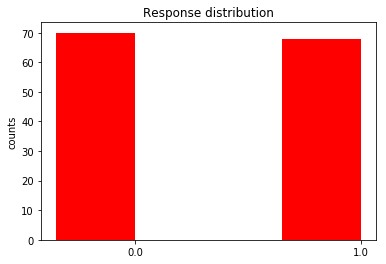

In [207]:
from matplotlib import pyplot as plt
%matplotlib inline
 
responses = df.groupBy('indexed_2nd_Heart_Attack').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='r')
 
plt.ylabel('counts')
plt.title('Response distribution')
plt.xticks(ind + width/2., categories)

In [208]:
for col in df.columns[1:-2]:
    print(col, df.select(col).distinct().count())

('Marital_Status', 4)
('Gender', 2)
('Weight_Category', 3)
('Cholesterol', 55)
('Stress_Management', 2)


# DecisionTreeRegressor

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(ad_df)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = ad_df.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol="indexedFeatures")

# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, dt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

treeModel = model.stages[1]
# summary only
print(treeModel)


+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|[49.0,1.0,1.0,0.0...|
|       0.0|  0.0|[51.0,1.0,0.0,0.0...|
|       0.0|  0.0|[52.0,1.0,0.0,0.0...|
|       0.0|  0.0|[52.0,1.0,1.0,0.0...|
|       1.0|  0.0|[52.0,1.0,1.0,1.0...|
+----------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.257074
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_41c391d088236c432860) of depth 5 with 21 nodes


- **GBTRegressor**

In [219]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbtModel = model.stages[1]
print(gbtModel)  # summary only

+--------------------+-----+--------------------+
|          prediction|label|            features|
+--------------------+-----+--------------------+
|-4.29326931031838...|  0.0|[42.0,1.0,0.0,0.0...|
|0.003492694903010...|  0.0|[49.0,1.0,0.0,0.0...|
|-4.29326931031838...|  0.0|[50.0,1.0,1.0,0.0...|
|-4.29326931031838...|  0.0|[51.0,1.0,1.0,0.0...|
|-4.29326931031838...|  0.0|[52.0,1.0,0.0,0.0...|
+--------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.268009
GBTRegressionModel (uid=GBTRegressor_4e24acf88255e4bd7fe2) with 10 trees


- **DecisionTreeRegression using rawdata set**

In [28]:
# Split the dataset randomly into 70% for training and 30% for testing.
train, test = df.randomSplit([0.7, 0.3])
print "We have %d training examples and %d test examples." % (train.count(), test.count())


We have 101 training examples and 37 test examples.


In [23]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
featuresCols = df.columns
featuresCols.remove('indexed_2nd_Heart_Attack')
# This concatenates all feature columns into a single feature vector in a new column "rawFeatures".
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
# This identifies categorical features and indexes them.
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

- all feature columns into a single feature vector in a new column "rawFeatures"

In [24]:
from pyspark.ml.regression import GBTRegressor
# Takes the "features" column and learns to predict "cnt"
gbt = GBTRegressor(labelCol="indexed_2nd_Heart_Attack")

In [25]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.  In practice, to get the highest accuracy, you would likely want to try deeper trees (10 or higher) and more trees in the ensemble (>100).
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  This tells CrossValidator how well we are doing by comparing the true labels with predictions.
evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)


In [26]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])


In [30]:
pipelineModel = pipeline.fit(train)

- Finally, we can tie our feature processing and model training stages together into a single Pipeline.
- Train the Pipeline!
- Now that we have set up our workflow, we can train the Pipeline in a single call. Calling fit() will run feature processing, model tuning, and training in a single call. We get back a fitted Pipeline with the best model found.
   - Note: This next cell can take up to 10 minutes. This is because it is training a lot of trees:
    - For each random sample of data in Cross Validation,
    - For each setting of the hyperparameters,
    - CrossValidator is training a separate GBT ensemble which contains many Decision Trees.

In [31]:
predictions = pipelineModel.transform(test)

In [33]:
display(predictions.select("indexed_2nd_Heart_Attack", "prediction", *featuresCols))

DataFrame[indexed_2nd_Heart_Attack: double, prediction: double, Age: double, Marital_Status: double, Gender: double, Weight_Category: double, Cholesterol: double, Stress_Management: double, Trait_Anxiety: double]

In [35]:
rmse = evaluator.evaluate(predictions)
print "RMSE on our test set: %g" % rmse

RMSE on our test set: 0.210957


# Improving  model
- This section describes how to take this notebook and improve the results even more. Try copying this notebook into your Databricks account and extending it, and see how much you can improve the predictions.
- There are several ways we could further improve our model:
- Expert knowledge: We may not be experts on bike sharing programs, but we know a few things we can use:
- The count of rentals cannot be negative. GBTRegressor does not know that, but we could threshold the predictions to be >= 0 post-hoc.
- The count of rentals is the sum of registered and casual rentals. These two counts may have different behavior. (Frequent cyclists and casual cyclists probably rent bikes for different reasons.) The best models for this dataset take this into account. Try training one GBT model for registered and one for casual, and then add their predictions together to get the full prediction.
- Better tuning: To make this notebook run quickly, we only tried a few hyperparameter settings. To get the most out of our data, we should test more settings. Start by increasing the number of trees in our GBT model by setting maxIter=200; it will take longer to train but can be more accurate.
- Feature engineering: We used the basic set of features given to us, but we could potentially improve them. For example, we may guess that weather is more or less important depending on whether or not it is a workday vs. weekend. To take advantage of that, we could build a few feature by combining those two base features. MLlib provides a suite of feature transformers; find out more in the ML guide.

# References
 - https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine

- https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning

- https://spark.apache.org/docs/latest/ml-classification-regression.html#regression
    
- https://spark.apache.org/docs/latest/ml-clustering.html
    
- http://sean.lane.sh/blog/2016/PySpark_and_LDA
    
- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3741049972324885/3783546674231782/4413065072037724/latest.html
    
- https://stackoverflow.com/questions/29600673/how-to-delete-columns-in-pyspark-dataframe
    
- https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html
    
- https://weiminwang.blog/2016/06/09/pyspark-tutorial-building-a-random-forest-binary-classifier-on-unbalanced-dataset/

- https://docs.databricks.com/spark/latest/mllib/decision-trees.html